# Course Name: Data Analysis and Visualization

## Assignment Description

1. Read the content below and complete the code for each problem. Submit your work as a PDF.
2. Submissions as notebook files or Colab shares instead of PDFs will result in point deductions.
3. It is acceptable to include explanatory text or other content unrelated to the code.

## Problem Context

### Data Background Knowledge

YouTube (a globally famous video-sharing website) manages a list of the most popular videos on its platform.

According to Variety magazine, to determine the most popular videos of the year, YouTube combines various factors, such as user interactions (views, shares, comments, and likes). However, it is not necessarily the most viewed video of the entire year.

The best-performing videos on YouTube's trending list include music videos (e.g., the famously masculine "Gangnam Style"), celebrity and/or reality TV performances, and random viral videos well-known on YouTube.

The dataset for analysis is a daily record of trending YouTube videos.

### Dataset for Analysis

- Dataset for analysis: https://www.kaggle.com/datasets/datasnaek/youtube-new?select=KRvideos.csv
- Also available on the shared Google Drive for the course.
- File name: KRvideos.csv

###  Assignment Objectives

- Load the dataset and check its descriptive statistics.
- Identify missing values and replace them with 0.
- If duplicate data exists, count the occurrences and remove duplicates.
- Calculate and visualize the total views per channel.
- Calculate and visualize the total views per channel for the top 100 entries.
- Select only the 'title' and 'views' columns, sort by the number of views, and remove duplicates.
- Use the 'title' column to create a word cloud visualization for Korean text only.
- Visualize the correlation of the 'views', 'likes', 'dislikes', and 'comment_count' columns using a heatmap.
- Use the 'category_id', 'views', 'likes', and 'comment_count' columns to create meaningful visualizations such as scatterplots, barplots, histplots, and countplots.


# Load the dataset and check its descriptive statistics

In [ ]:
# 데이터셋 불러오기
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/빅데이터 강의 /데이터분석과 시각화/과제/"
import pandas as pd
KRvideo = pd.read_csv(f"{DATA_PATH}KRvideos.csv")
KRvideo.head()

Mounted at /content/drive


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [ ]:
# 기초 기술 통계량 확인
KRvideo.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,21853.0,21.021690,6.684236e+00,1.0,22.0,24.0,25.0,44.0
views,21853.0,420551.903995,2.379041e+06,2050.0,45104.0,105470.0,273081.0,113876217.0
likes,21853.0,10737.429277,9.113903e+04,0.0,372.0,1219.0,3336.0,2811223.0
dislikes,21853.0,582.065025,1.685875e+04,0.0,19.0,60.0,164.0,1470388.0
comment_count,21853.0,1796.819933,1.609821e+04,0.0,93.0,311.0,851.0,827771.0


# Identify missing values and replace them with 0

In [ ]:
# 자료 구조, 결측치 등 확인
KRvideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21853 entries, 0 to 21852
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                21853 non-null  object
 1   trending_date           21853 non-null  object
 2   title                   21853 non-null  object
 3   channel_title           21853 non-null  object
 4   category_id             21853 non-null  int64 
 5   publish_time            21853 non-null  object
 6   tags                    21853 non-null  object
 7   views                   21853 non-null  int64 
 8   likes                   21853 non-null  int64 
 9   dislikes                21853 non-null  int64 
 10  comment_count           21853 non-null  int64 
 11  thumbnail_link          21853 non-null  object
 12  comments_disabled       21853 non-null  bool  
 13  ratings_disabled        21853 non-null  bool  
 14  video_error_or_removed  21853 non-null  bool  
 15  de

In [ ]:
# 결측치 총 개수 확인. description열에서 2315개의 결측치 확인함
KRvideo.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2315
dtype: int64

In [ ]:
# 결측치 0으로 치환
KRvideo['description'] = KRvideo['description'].fillna(0)

In [ ]:
# 결측치 치환 여부 확인
KRvideo.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [ ]:
# 결측치 제거한 후, 자료 구조 확인
KRvideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21853 entries, 0 to 21852
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                21853 non-null  object
 1   trending_date           21853 non-null  object
 2   title                   21853 non-null  object
 3   channel_title           21853 non-null  object
 4   category_id             21853 non-null  int64 
 5   publish_time            21853 non-null  object
 6   tags                    21853 non-null  object
 7   views                   21853 non-null  int64 
 8   likes                   21853 non-null  int64 
 9   dislikes                21853 non-null  int64 
 10  comment_count           21853 non-null  int64 
 11  thumbnail_link          21853 non-null  object
 12  comments_disabled       21853 non-null  bool  
 13  ratings_disabled        21853 non-null  bool  
 14  video_error_or_removed  21853 non-null  bool  
 15  de

# If duplicate data exists, count the occurrences and remove duplicates


In [ ]:
# 중복 데이터 확인
KRvideo[KRvideo.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1577,#NAME?,17.22.11,빡친 윤종신 feat.슈스케,잠시만안녕,10,2017-11-20T12:41:50.000Z,"McTheMax|""이수""|""김동명""|""하현우""|""윤종신""|""가창력""|""고음""|""임창...",892976,1947,314,950,https://i.ytimg.com/vi/-FiapiFegHM/default.jpg,False,False,False,+귀여운 종신이형\n변상국 박재정 내일할일(윤종신) \n슈스케
1578,tNtcYIo6N04,17.22.11,BTS - DNA (Live at the AMA's 2017) 4K HD Perfo...,BTS Videos,10,2017-11-20T14:29:30.000Z,"bts|""방탄소년단""|""amas""|""american music awards""|""am...",3810593,239139,2529,11591,https://i.ytimg.com/vi/tNtcYIo6N04/default.jpg,False,False,False,"BTS performs DNA at the 2017 AMAs, making hist..."
1579,8R8GVxopH5M,17.22.11,아기부터 챙긴 산후조리원 직원들 / SBS,SBS 뉴스,25,2017-11-18T12:48:37.000Z,"뉴스|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""SBS8N...",1027297,12410,253,3162,https://i.ytimg.com/vi/8R8GVxopH5M/default.jpg,False,False,False,지진이 난 긴박한 순간에도 아기들의 안전을 먼저 챙긴 산후조리원 직원들이 있습니다....
1580,6HKZrG80mM0,17.22.11,ASA reacts to AMA's (BTS Performance!),Jewels,22,2017-11-20T06:27:54.000Z,"bts|""bangtan sonyeondan""|""kpop""|""korean pop""|""...",107146,1821,21,112,https://i.ytimg.com/vi/6HKZrG80mM0/default.jpg,False,False,False,Follow us on our social media!\nFacebook: http...
1581,J-o9kz5qHlw,17.22.11,웨스트햄 팬에게인종차별을 당한 손흥민의 반응은?? | 페라리타고 인종차별을 당하다,풋인포,17,2017-11-18T07:11:05.000Z,"손흥민|""인종차별""|""웨스트햄""|""풋인포""",526366,1132,115,984,https://i.ytimg.com/vi/J-o9kz5qHlw/default.jpg,False,False,False,손흥민 인종차별에 대한 대응
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21469,DrAOyD60C7Y,18.23.03,"신의한수 생방송 18.03.22 / 문재인, 미군철수 선언!",신의한수,25,2018-03-22T08:09:00.000Z,[none],76052,2908,111,414,https://i.ytimg.com/vi/DrAOyD60C7Y/default.jpg,False,False,False,(주)민초 커뮤니케이션 대표 신혜식입니다. 자발적 유로 구독 참여를 부탁드립니다.\...
21470,iEBUpo24nLw,18.23.03,[LIVE] 프로야구 KBO리그 미디어데이&팬페스트,리얼360,22,2018-03-22T08:02:23.000Z,"프로야구|""야구""|""기아""|""엘지""|""삼성""|""롯데""|""넥센히어로즈""|""미디어데이&...",14942,95,5,19,https://i.ytimg.com/vi/iEBUpo24nLw/default.jpg,False,False,False,2018 KBO프로야구 미디어데이&팬페스트가 서울 용산구 한남동 블루스퀘어 아이마켓...
21471,Rxk0HxuKF9w,18.23.03,제가 발굴한 프로게이머를 소개합니다ㅋㅋㅋㅋㅋㅋ,김재원의 즐거운게임 세상,20,2018-03-21T07:00:02.000Z,"오버워치|""오버워치 김재원""|""오버워치 안스""|""오버워치 김재원 프로게이머""|""김재...",301087,7052,65,2175,https://i.ytimg.com/vi/Rxk0HxuKF9w/default.jpg,False,False,False,재미있게 보셧나용\n김재원 방송 https://www.twitch.tv/jaewon...
21472,8mB-c6YkROU,18.23.03,외계인의 장난감이 된 인간들,빡센TV,1,2018-03-19T08:00:01.000Z,"영화|""영화리뷰""|""영화소개""|""영화추천""|""빡센TV""|""빡센티비""|""씽크맨""|""루...",1233512,14308,673,2945,https://i.ytimg.com/vi/8mB-c6YkROU/default.jpg,False,False,False,제목 : 판타스틱 플래닛\n이얌 행성의 트라그인들은 테라 행성에 살고 있던 옴을 가...


In [ ]:
# 중복 데이터 제거
KRvideo = KRvideo[~KRvideo.duplicated()]
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21848,tDqK3ugZcM0,18.26.03,[Choreography Video] 부석순(SEVENTEEN) - 거침없이(Jus...,SEVENTEEN,10,2018-03-25T13:09:51.000Z,"세븐틴|""부석순""|""SEVENTEEN""|""JUST DO IT""|""거침없이""|""호시""...",368632,61403,119,4152,https://i.ytimg.com/vi/tDqK3ugZcM0/default.jpg,False,False,False,[Choreography Video] 부석순(SEVENTEEN) - 거침없이(Jus...
21849,wLhuw2Q6K-M,18.26.03,본인은 '돌솥밥' 먹으면서 손님에게 '공깃밥' 준 MB,Korean News,24,2018-03-15T16:43:28.000Z,[none],254309,401,170,376,https://i.ytimg.com/vi/wLhuw2Q6K-M/default.jpg,False,False,False,▶유튜브 구독하기: https://goo.gl/yShdfS \n본인은 '돌솥밥' 먹...
21850,#NAME?,18.26.03,속속 드러나는 4대강의 충격적인 비리 이명박 어마어마한 돈을 해먹었다,DO YOU KNOW GANGNAMSTYLE?,24,2018-03-24T18:27:23.000Z,[none],67947,728,50,137,https://i.ytimg.com/vi/-Rg1_AC3_q8/default.jpg,False,False,False,0
21851,3GrbSBW8sk0,18.26.03,"18년3월25일 임자 잘못만난 문과 김,최후통첩같은 존볼튼의 회담조건",tv나라애,22,2018-03-25T05:58:04.000Z,[none],76638,3596,45,247,https://i.ytimg.com/vi/3GrbSBW8sk0/default.jpg,False,False,False,"nsc보좌관 임뎡되던날,잠시 하룻동안 나긋한 발언을 했던 존볼튼,하루지나,북괴에게 ..."


In [ ]:
# 중복 데이터 제거 완료 확인
KRvideo[KRvideo.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


In [ ]:
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21848,tDqK3ugZcM0,18.26.03,[Choreography Video] 부석순(SEVENTEEN) - 거침없이(Jus...,SEVENTEEN,10,2018-03-25T13:09:51.000Z,"세븐틴|""부석순""|""SEVENTEEN""|""JUST DO IT""|""거침없이""|""호시""...",368632,61403,119,4152,https://i.ytimg.com/vi/tDqK3ugZcM0/default.jpg,False,False,False,[Choreography Video] 부석순(SEVENTEEN) - 거침없이(Jus...
21849,wLhuw2Q6K-M,18.26.03,본인은 '돌솥밥' 먹으면서 손님에게 '공깃밥' 준 MB,Korean News,24,2018-03-15T16:43:28.000Z,[none],254309,401,170,376,https://i.ytimg.com/vi/wLhuw2Q6K-M/default.jpg,False,False,False,▶유튜브 구독하기: https://goo.gl/yShdfS \n본인은 '돌솥밥' 먹...
21850,#NAME?,18.26.03,속속 드러나는 4대강의 충격적인 비리 이명박 어마어마한 돈을 해먹었다,DO YOU KNOW GANGNAMSTYLE?,24,2018-03-24T18:27:23.000Z,[none],67947,728,50,137,https://i.ytimg.com/vi/-Rg1_AC3_q8/default.jpg,False,False,False,0
21851,3GrbSBW8sk0,18.26.03,"18년3월25일 임자 잘못만난 문과 김,최후통첩같은 존볼튼의 회담조건",tv나라애,22,2018-03-25T05:58:04.000Z,[none],76638,3596,45,247,https://i.ytimg.com/vi/3GrbSBW8sk0/default.jpg,False,False,False,"nsc보좌관 임뎡되던날,잠시 하룻동안 나긋한 발언을 했던 존볼튼,하루지나,북괴에게 ..."


In [ ]:
# 중복데이터 제거 후, 자료 구조 확인
KRvideo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20778 entries, 0 to 21852
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                20778 non-null  object
 1   trending_date           20778 non-null  object
 2   title                   20778 non-null  object
 3   channel_title           20778 non-null  object
 4   category_id             20778 non-null  int64 
 5   publish_time            20778 non-null  object
 6   tags                    20778 non-null  object
 7   views                   20778 non-null  int64 
 8   likes                   20778 non-null  int64 
 9   dislikes                20778 non-null  int64 
 10  comment_count           20778 non-null  int64 
 11  thumbnail_link          20778 non-null  object
 12  comments_disabled       20778 non-null  bool  
 13  ratings_disabled        20778 non-null  bool  
 14  video_error_or_removed  20778 non-null  bool  
 15  de

# Calculate and visualize the total views per channel

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53916 (\N{HANGUL SYLLABLE TYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

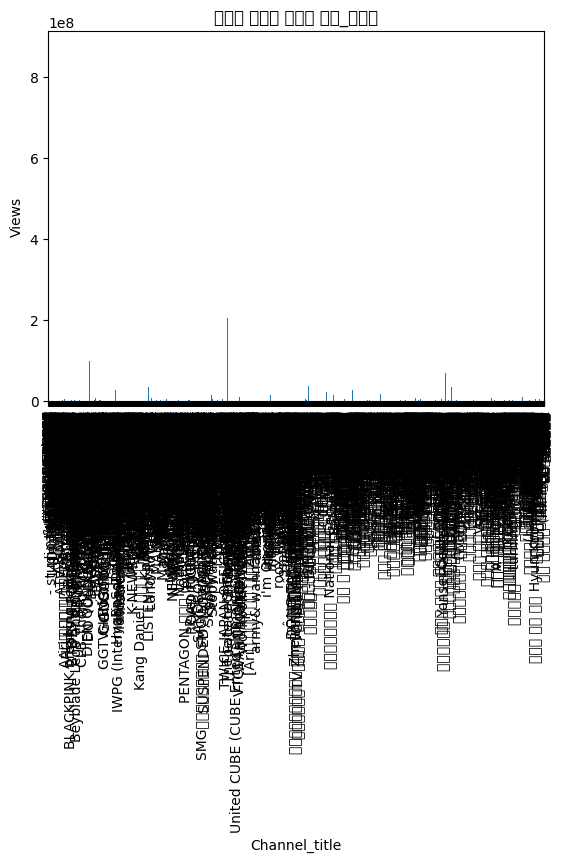

In [ ]:
# channel_title이 채널별을 나타내주는 열이며 조회수는 views열이므로, channel_title로 gruopby를 통해 views의 합을 구하고 시각화 함
import matplotlib.pyplot as plt
channel_title_views = KRvideo.groupby('channel_title')['views'].sum()
channel_title_views.plot(kind='bar')
plt.xlabel('Channel_title')
plt.ylabel('Views')
plt.title('유튜브 채널별 조회수 합계_시각화')
plt.show()

# Calculate and visualize the total views per channel for the top 100 entries

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53916 (\N{HANGUL SYLLABLE TYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

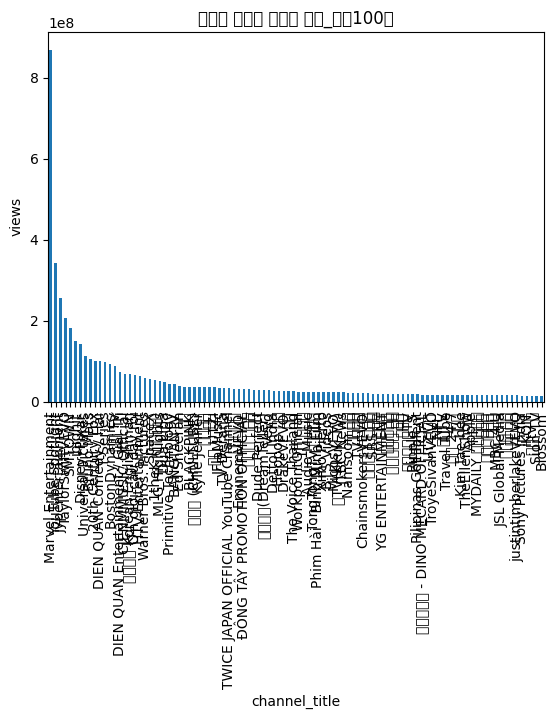

In [ ]:
#  nlargrest를 이용하여 상위 100건에 대한 정보를 얻어내고 이를 시각화함
top_100_channels = channel_title_views.nlargest(100)
top_100_channels.plot(kind='bar')
plt.xlabel('channel_title')
plt.ylabel('views')
plt.title('유튜브 채널별 조회수 합계_상위100건')
plt.show()

# Select only the 'title' and 'views' columns, sort by the number of views, and remove duplicates


In [ ]:
# 'title','views'만 선택하여 많은 views 순으로 정렬 후, 중복 데이터 확인
selected_columns = ['views','title']
selected_columns = KRvideo[selected_columns].sort_values(by='views', ascending=False)
selected_columns[selected_columns.duplicated()]

,views,title
3330,66637636,Marvel Studios' Avengers: Infinity War Officia...
20237,19716689,Marvel Studios' Avengers: Infinity War - Offic...
13214,16773819,Red Velvet 레드벨벳 'Bad Boy' MV
12878,10964492,Red Velvet 레드벨벳 'Bad Boy' MV
21285,10454654,Deadpool 2 | The Trailer
11025,2827100,[MV] SUNMI (선미) _ Heroine (주인공)
20064,2562782,BIGBANG - 꽃 길 (Flower Road) (ENG SUB ADDED)
15431,1948452,Incredibles 2 - Olympics Sneak Peek
9727,1556910,TWICE「Candy Pop」Music Video
9352,1283297,BLACKPINK - ‘블핑하우스 (BLACKPINK HOUSE)’ EP.1-2


In [ ]:
# 중복 데이터 제거
selected_columns = selected_columns[~selected_columns.duplicated()]
selected_columns

,views,title
4854,113876217,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
4676,100911567,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
4016,87450245,Marvel Studios' Avengers: Infinity War Officia...
3750,84281319,Marvel Studios' Avengers: Infinity War Officia...
3544,80360459,Marvel Studios' Avengers: Infinity War Officia...
...,...,...
4804,3268,다니엘 생일 축하해!
18566,3124,[홍익인간 인성교육] 7128강 산에 들어가고 싶다
17412,2919,애슐리 18년도 딸기축제 영상❣
509,2623,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그


In [ ]:
# 중복 데이터 제거 완료 확인
selected_columns[selected_columns.duplicated()]

,views,title


# Use the 'title' column to create a word cloud visualization for Korean text only

In [ ]:
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.15.0-py3-none-any.whl size=30602629 sha256=469a06b4faf55f30781e39cbaf703397b9e00fc94680ba480d8dc3870940dd3e
  Stored in directory: /root/.cache/pip/wheels/f3/55/41/ca474338ece1bc4314b01445f64ff002d71e19df45575a16e2
Successfully built kiwipiepy-model


In [ ]:
# 분석의 대상이 되는 title 열만 추출
from wordcloud import WordCloud
KRvideo_list = KRvideo['title'].values
len(KRvideo_list)

20778

In [ ]:
# 한글 형태소 분석 패키지 로드
from kiwipiepy import Kiwi
kiwi = Kiwi()

# 데이터프레임에서 분석대상 문장 전체를 단어 토큰화
one_line_str_data = ''.join(KRvideo_list)
kiwi_data = kiwi.tokenize(one_line_str_data)
kiwi_data

[Token(form='좋', tag='VA', start=0, len=1),
 Token(form='어', tag='EC', start=1, len=1),
 Token(form='by', tag='SL', start=3, len=2),
 Token(form='민서', tag='NNG', start=6, len=2),
 Token(form='_', tag='SW', start=8, len=1),
 Token(form='윤종신', tag='NNP', start=9, len=3),
 Token(form='_', tag='SW', start=12, len=1),
 Token(form='좋', tag='VA', start=13, len=1),
 Token(form='니', tag='EC', start=14, len=1),
 Token(form='답', tag='NNG', start=16, len=1),
 Token(form='가', tag='XSN', start=17, len=1),
 Token(form='JSA', tag='SL', start=18, len=3),
 Token(form='귀순', tag='NNG', start=22, len=2),
 Token(form='북한군', tag='NNG', start=25, len=3),
 Token(form='총격', tag='NNG', start=29, len=2),
 Token(form='부상', tag='NNG', start=32, len=2),
 Token(form='나몰라패밀리', tag='NNP', start=34, len=6),
 Token(form='운동화', tag='NNG', start=41, len=3),
 Token(form='영상', tag='NNG', start=45, len=2),
 Token(form='2', tag='SN', start=48, len=1),
 Token(form='탄', tag='NNG', start=49, len=1),
 Token(form='(', tag='SSO', st

In [ ]:
# 토큰의 갯수 파악을 위한 패키지 로드
from collections import Counter

# 분석 대상을 특정 품사로 제한하여 토큰 수집(재분류)
check_pummsa = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL']
filter_result = [(token.form, token.tag) for token in kiwi_data if token.tag in check_pummsa]
token_count = Counter(filter_result) # 분석 대상 토큰의 빈도수 계산
token_count

Counter({('좋', 'VA'): 202,
         ('by', 'SL'): 150,
         ('민서', 'NNG'): 3,
         ('윤종신', 'NNP'): 26,
         ('답', 'NNG'): 26,
         ('JSA', 'SL'): 48,
         ('귀순', 'NNG'): 158,
         ('북한군', 'NNG'): 21,
         ('총격', 'NNG'): 2,
         ('부상', 'NNG'): 12,
         ('나몰라패밀리', 'NNP'): 14,
         ('운동화', 'NNG'): 2,
         ('영상', 'NNG'): 677,
         ('탄', 'NNG'): 76,
         ('빼빼로데이버젼', 'NNP'): 1,
         ('이명박', 'NNG'): 21,
         ('출국', 'NNG'): 23,
         ('현장', 'NNG'): 167,
         ('놓치', 'VV'): 10,
         ('되', 'VV'): 486,
         ('장면', 'NNG'): 103,
         ('김장겸', 'NNP'): 17,
         ('물러가', 'VV'): 5,
         ('MBC', 'SL'): 214,
         ('노조', 'NNG'): 16,
         ('환호', 'NNG'): 18,
         ('눈물', 'NNG'): 195,
         ('김정숙', 'NNP'): 27,
         ('여사', 'NNG'): 51,
         ('문재인', 'NNP'): 875,
         ('대통령', 'NNG'): 701,
         ('주머니', 'NNG'): 5,
         ('손', 'NNG'): 99,
         ('넣', 'VV'): 39,
         ('인도네시아', 'NNP'): 7,
 

In [ ]:
# 워드클라우트 시각화를 위해 generate_from_frequencies를 사용해야 하고 이는 딕셔너리 형태로 받아줘야 하기에, 일부러 top 100 딕셔너리를 만듬
from wordcloud import WordCloud
top_100 = {}
for (morpheme, parts_of_speech), x_count in token_count.most_common(100):
    top_100[morpheme] = x_count
top_100

{'하': 1030,
 '문재인': 875,
 '대통령': 701,
 '영상': 677,
 '평창': 659,
 '뉴스': 656,
 'TV': 640,
 '이유': 624,
 '보': 623,
 '반응': 584,
 '방송': 560,
 '올림픽': 524,
 '충격': 503,
 '되': 486,
 '가': 477,
 '먹': 474,
 'vs': 470,
 '한국': 469,
 '김어준': 416,
 '없': 415,
 '여자': 412,
 'BTS': 409,
 '먹방': 406,
 '공개': 380,
 '말': 373,
 '오': 371,
 't': 352,
 '방탄소년단': 350,
 '선수': 344,
 '워너원': 341,
 'n': 340,
 'X': 339,
 'i': 309,
 '친구': 305,
 '이명박': 289,
 'ng': 282,
 '남자': 279,
 'VS': 278,
 '공장': 275,
 '일본': 273,
 '미국': 273,
 '태극기': 273,
 '알': 272,
 '안희정': 270,
 '나': 267,
 'c': 266,
 '북한': 265,
 '만들': 253,
 '있': 211,
 '강': 243,
 'feat.': 243,
 '후': 241,
 '영화': 239,
 '기자': 239,
 '베이': 238,
 'U': 236,
 '홍준표': 232,
 '수': 230,
 '박근혜': 230,
 's': 229,
 'MB': 228,
 '아라시': 224,
 '블레이드': 223,
 '때': 223,
 '일': 219,
 'EP.': 216,
 'MBC': 214,
 '사람': 212,
 '팬': 211,
 'MV': 210,
 '신': 209,
 '전': 206,
 '게임': 203,
 '좋': 202,
 '집': 202,
 '리뷰': 202,
 '칼럼': 201,
 '고양이': 200,
 '종현': 200,
 '중국': 198,
 '인터뷰': 198,
 '눈물': 195,
 '팀': 194,
 '김정은': 

In [ ]:
# 설치된 폰트 확인을 위함
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberati

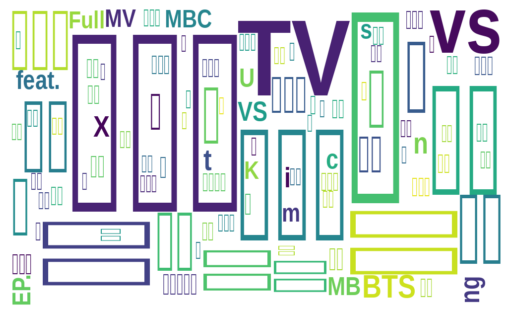

In [ ]:
# 워드클라우드 시각화
font_path = '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf'
wc = WordCloud(width=1000, height=600, background_color="white", font_path=font_path) # random_state=42
plt.imshow(wc.generate_from_frequencies(top_100))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualize the correlation of the 'views', 'likes', 'dislikes', and 'comment_count' columns using a heatmap


<Axes: >

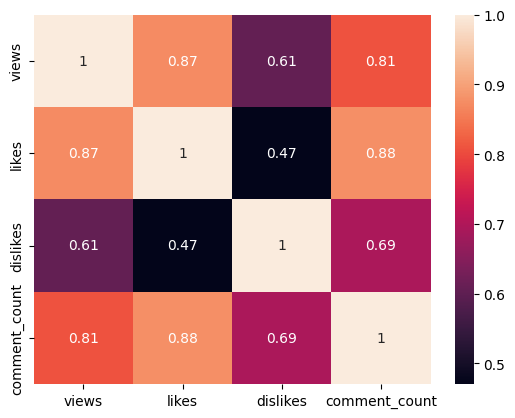

In [ ]:
# 'views', 'likes', 'dislikes', 'comment_count' 컬럼 값의 상관계수
import seaborn as sns
selected_cols = KRvideo[['views', 'likes', 'dislikes', 'comment_count']]
sns.heatmap(selected_cols.corr(), annot=True)

Use the 'category_id', 'views', 'likes', and 'comment_count' columns to create meaningful visualizations such as scatterplots, barplots, histplots, and countplots

In [ ]:
# 시각화를 하기 전, 'category_id', 'views', 'likes', 'comment_count'에 대한 정보 확인
selected_cols_two = KRvideo[['category_id', 'views', 'likes', 'comment_count']]
selected_cols_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20778 entries, 0 to 21852
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   category_id    20778 non-null  int64
 1   views          20778 non-null  int64
 2   likes          20778 non-null  int64
 3   comment_count  20778 non-null  int64
dtypes: int64(4)
memory usage: 811.6 KB


In [ ]:
# category_id는 Dtpye이 수치형으로 되어 있지만, 사실상 범주형 데이터임
selected_cols_two.head()

,category_id,views,likes,comment_count
0,22,156130,1422,272
1,25,76533,211,113
2,22,421409,5112,459
3,25,222850,2093,1219
4,25,84466,1094,450


In [ ]:
# category_id가 범주형 데이터인 것을 확인하기 위해,  category_id의 열의 정보만 확인함
KRvideo['category_id']

0        22
1        25
2        22
3        25
4        25
         ..
21848    10
21849    24
21850    24
21851    22
21852    10
Name: category_id, Length: 20778, dtype: int64

In [ ]:
# category_id가 범주형 데이터인 것을 확인하기 위해,  category_id의 열의 정보만 확인함
KRvideo['category_id'].describe()

count    20778.000000
mean        21.025411
std          6.662031
min          1.000000
25%         22.000000
50%         24.000000
75%         25.000000
max         44.000000
Name: category_id, dtype: float64

In [ ]:
# 'category_id'가 범주형 데이터라는 것을 확인하였고 'category_id'를 기준으로 나머지 열을 정리함
sorted_selected_cols_two = selected_cols_two.sort_values(by='category_id', ascending=False)
sorted_selected_cols_two

,category_id,views,likes,comment_count
16991,44,13454,3,1
17186,44,19845,3,1
19380,43,26849,46,37
4684,43,45152,126,157
368,43,229972,402,675
...,...,...,...,...
8151,1,129349,305,136
8132,1,200530,669,156
17174,1,88058,448,264
17175,1,252149,356,26


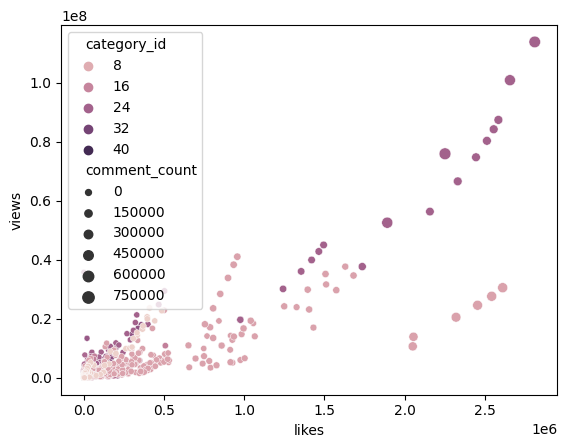

In [ ]:
# likes와 views간의 상관관계를 알아보는 scatter plot으로, category_id 를 hue에 설정함. 이는 category_id가 범주형 데이터임라 판단하였기 떄문이고, plot 크기를 commnet_count 별로 보기 위해 size를 comment_count로 설정함
sns.scatterplot(data=sorted_selected_cols_two, x="likes", y="views", hue='category_id', size ='comment_count')
plt.show()

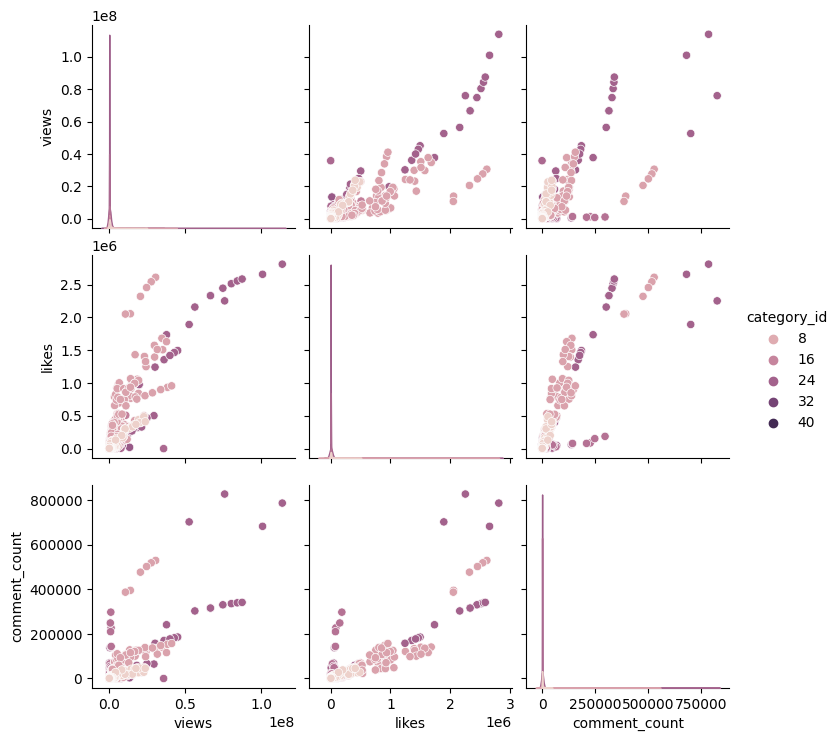

In [ ]:
# pairplot를 이용하여 수치형, 범주형 변수들간의 상관관계 시각화함
sns.pairplot(data=sorted_selected_cols_two, hue= 'category_id')
plt.show()
# views - likes, comment_count, likes - views, comment_count, comment_count - views, like 간의 양의 상관관계를 보임

In [ ]:
# views - likes, comment_count, likes - views, comment_count, comment_count - views, like 간의 상관관계를 수치화하여 확인하기 위함
import seaborn as sns
corr = sorted_selected_cols_two[['views', 'likes', 'comment_count']].corr()
ascending_order_corr = corr.unstack().sort_values(ascending=False)
ascending_order_corr

views          views            1.000000
likes          likes            1.000000
comment_count  comment_count    1.000000
likes          comment_count    0.877557
comment_count  likes            0.877557
views          likes            0.873275
likes          views            0.873275
views          comment_count    0.809522
comment_count  views            0.809522
dtype: float64

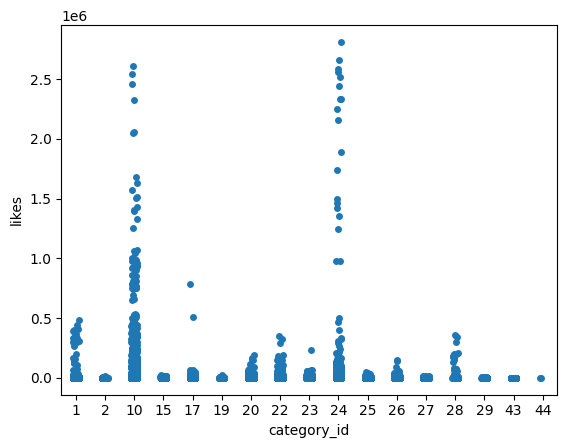

In [ ]:
# scatterplot(범주형과 함께 출력하는 산점도 plot)으로는 범주형 자료를 시각화하기 힘들어 stripplot를 선택하여 산점도를 확인하고자 함
sns.stripplot(data=sorted_selected_cols_two, x="category_id", y="likes")
plt.show()

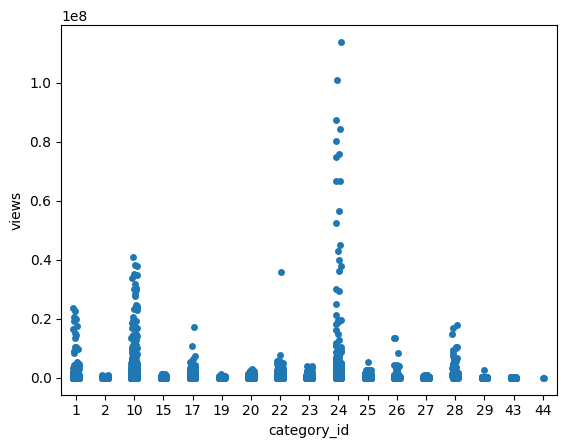

In [ ]:
sns.stripplot(data=sorted_selected_cols_two, x="category_id", y="views")
plt.show()

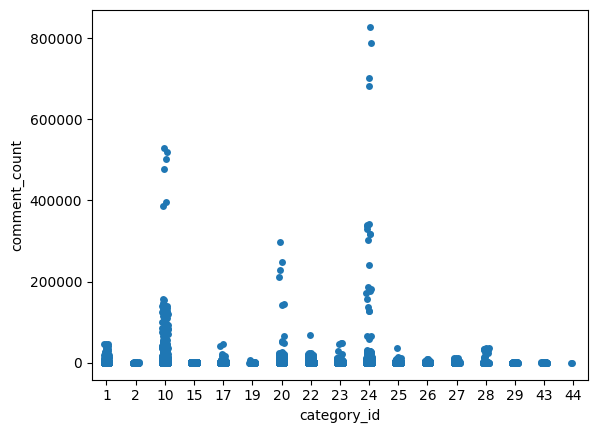

In [ ]:
sns.stripplot(data=sorted_selected_cols_two, x="category_id", y="comment_count")
plt.show()

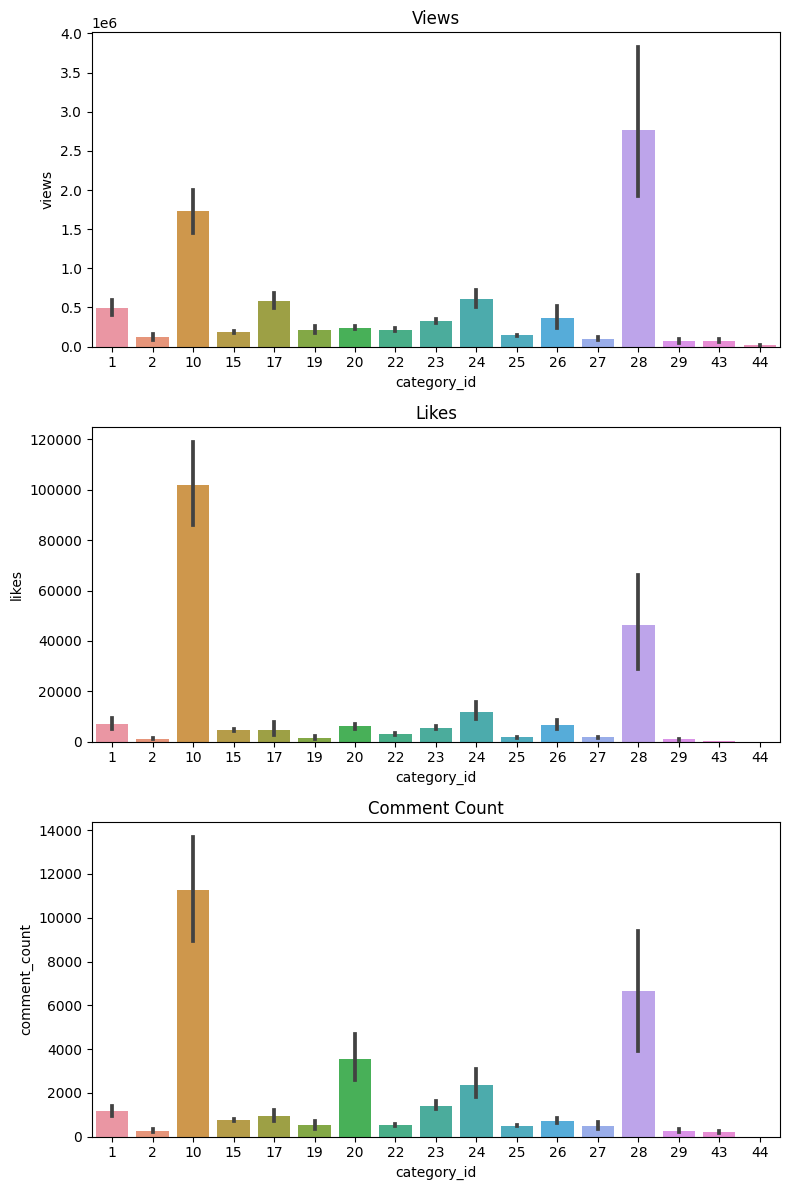

In [ ]:
# # barplot(특정 변수에 대한 통계값을 나타내는 그래프) 시각화
# fig, axes = plt.subplots(3, 1, figsize=(8, 12))
# sns.barplot(data=sorted_selected_cols_two, x='category_id', y='views', ax=axes[0])
# axes[0].set_title('Views')

# sns.barplot(data=sorted_selected_cols_two, x='category_id', y='likes', ax=axes[1])
# axes[1].set_title('Likes')

# sns.barplot(data=sorted_selected_cols_two, x='category_id', y='comment_count', ax=axes[2])
# axes[2].set_title('Comment Count')
# plt.tight_layout()
# plt.show()

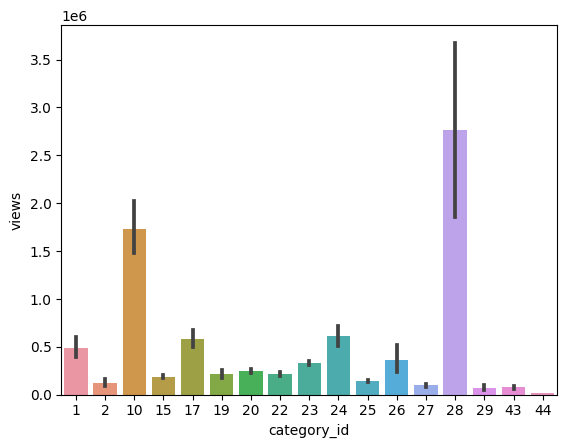

In [ ]:
# barplot(특정 변수에 대한 통계값을 나타내는 그래프) 시각화
sns.barplot(data=sorted_selected_cols_two, x='category_id', y='views')
plt.show()

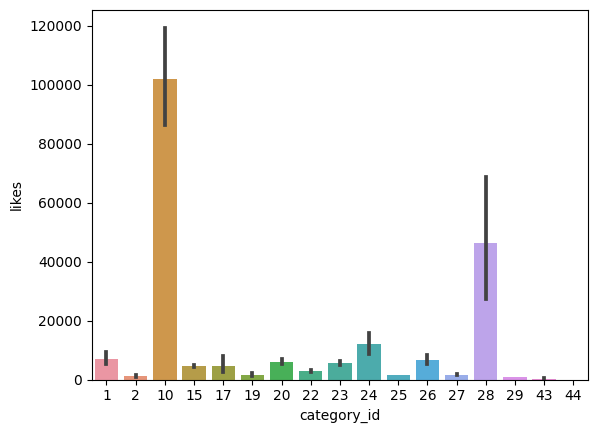

In [ ]:
# barplot(특정 변수에 대한 통계값을 나타내는 그래프) 시각화
sns.barplot(data=sorted_selected_cols_two, x='category_id', y='likes')
plt.show()

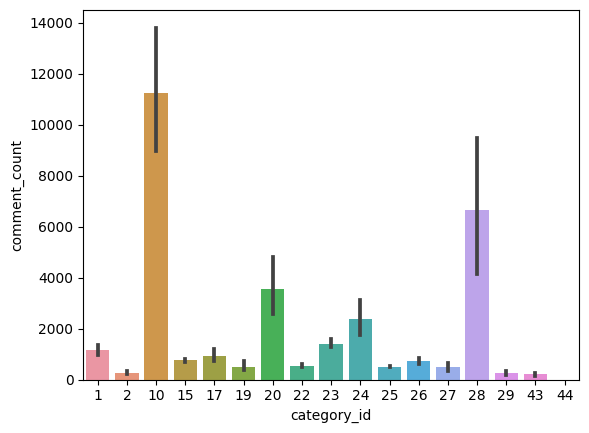

In [ ]:
# barplot 시각화
sns.barplot(data=sorted_selected_cols_two, x='category_id', y='comment_count')
plt.show()

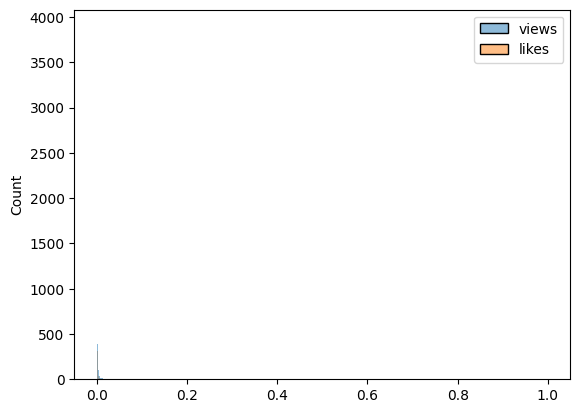

In [ ]:
# 서로 다른 규모 시각화를 위해 데이터 값을 스케일링함.StandardScaler는 특성의 평균이 0이 되고, 분산이 1이 되게 하는 스케일링으로 데이터의 값들을 표준화한 값들을 시각화 하기 위해 MinMaxScaler 보다는 StandardScaler 선택함
# 이를 histplot을 이용하여 시각화함.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
selected_cols_two_scaled = scaler.fit_transform(sorted_selected_cols_two[['views', 'likes','comment_count','category_id']])
selected_cols_two_scaled = pd.DataFrame(selected_cols_two_scaled, columns=['views', 'likes','comment_count','category_id'])

sns.histplot(data=selected_cols_two_scaled[['views', 'likes']])
plt.show()


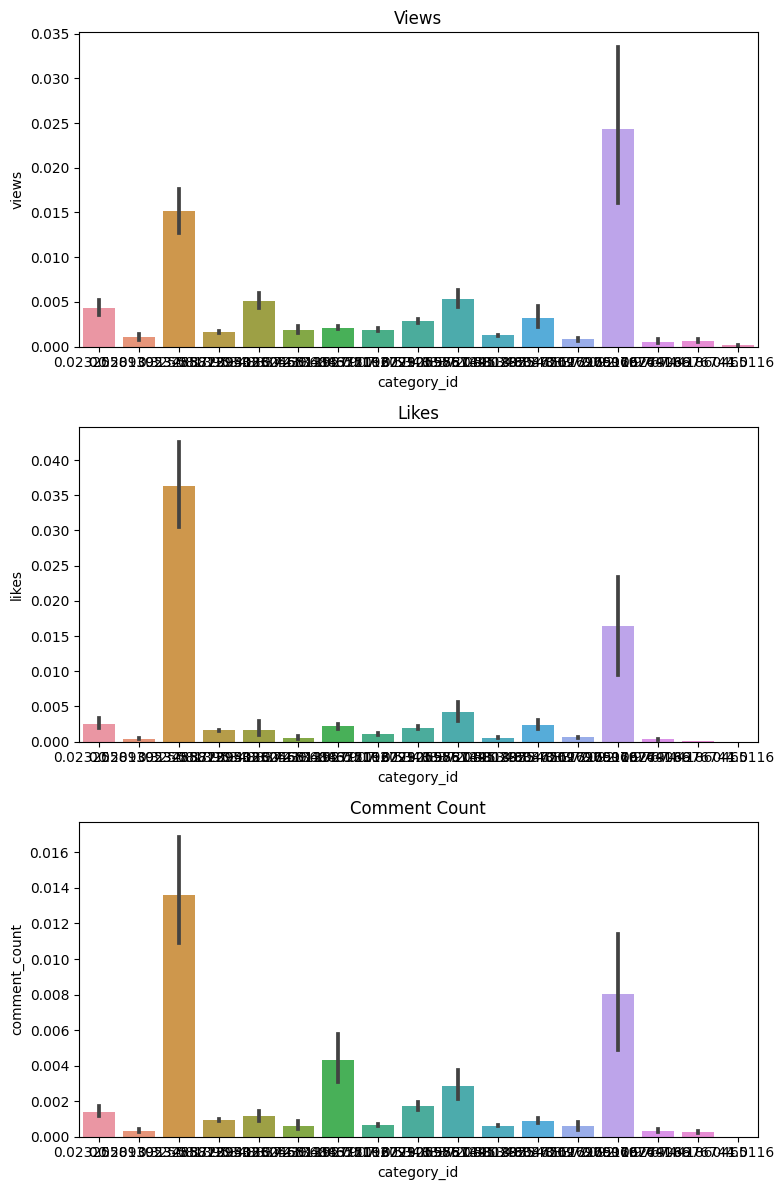

In [ ]:
# # barplot(특정 변수에 대한 통계값을 나타내는 그래프) 시각화
# fig, axes = plt.subplots(3, 1, figsize=(8, 12))
# sns.barplot(data=selected_cols_two_scaled, x='category_id', y='views', ax=axes[0])
# axes[0].set_title('Views')

# sns.barplot(data=selected_cols_two_scaled, x='category_id', y='likes', ax=axes[1])
# axes[1].set_title('Likes')

# sns.barplot(data=selected_cols_two_scaled, x='category_id', y='comment_count', ax=axes[2])
# axes[2].set_title('Comment Count')
# plt.tight_layout()
# plt.show()

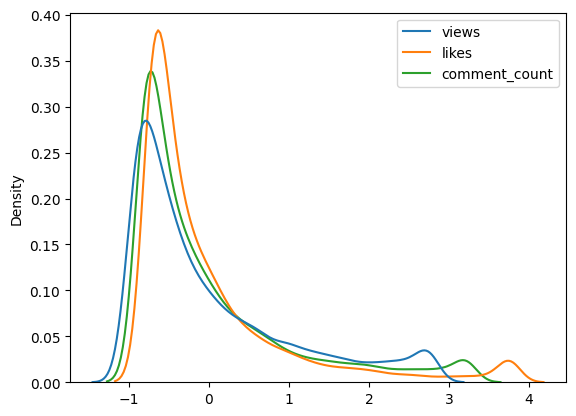

In [ ]:
# 수치형 데이터('views', 'likes','comment_count')끼리 정규분포를 확인하기 위한 시각화
from sklearn.preprocessing import PowerTransformer, StandardScaler
scaler = PowerTransformer()
selected_cols_two_scaled_t = scaler.fit_transform(selected_cols_two_scaled[['views', 'likes','comment_count','category_id']])
selected_cols_two_scaled_t = pd.DataFrame(selected_cols_two_scaled_t, columns=['views', 'likes','comment_count','category_id'])
sns.kdeplot(data=selected_cols_two_scaled_t[['views', 'likes','comment_count']])
plt.show()

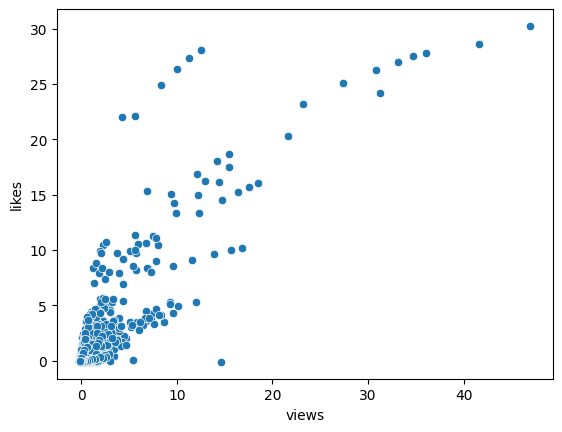

In [ ]:
# MinMaxScaler 사용하여 서로 다른 데이터를 통일하고 시각화함
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
selected_cols_two_scaled_sc = scaler.fit_transform(sorted_selected_cols_two[['views', 'likes','comment_count']])
selected_cols_two_scaled_sc = pd.DataFrame(selected_cols_two_scaled, columns=['views', 'likes','comment_count'])
sns.scatterplot(data=selected_cols_two_scaled_sc, x="views", y="likes")
plt.show()

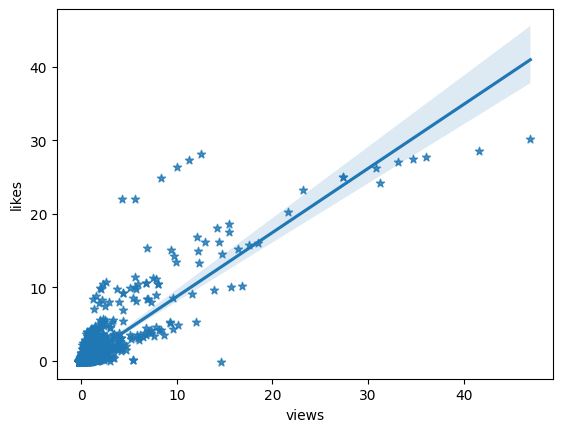

In [ ]:
sns.regplot(data=selected_cols_two_scaled_sc, x="views", y="likes", marker='*')
plt.show()

In [ ]:
#'category_id' 범주형 데이터임.
#'category_id'말고는 'views', 'likes', 'comment_count'수치형이기에 countplot을 이용하여 시각화하기에 어려움이 있었음
# 따라서, 'views', 'likes', 'comment_count' 수치형을 4분위를 이용하여 범주형으로 변경 후, 'category_id'와 비교하여 시각화함
labels = ['Q1', 'Q2', 'Q3', 'Q4']
selected_cols_two['views_Quartile'] = pd.qcut(selected_cols_two['views'], q=4, labels=labels)
selected_cols_two['likes_Quartile'] = pd.qcut(selected_cols_two['likes'], q=4, labels=labels)
selected_cols_two['comment_count_Quartile'] = pd.qcut(selected_cols_two['comment_count'], q=4, labels=labels)
selected_cols_two

<ipython-input-49-42df523638a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols_two['views_Quartile'] = pd.qcut(selected_cols_two['views'], q=4, labels=labels)
<ipython-input-49-42df523638a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols_two['likes_Quartile'] = pd.qcut(selected_cols_two['likes'], q=4, labels=labels)
<ipython-input-49-42df523638a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,category_id,views,likes,comment_count,views_Quartile,likes_Quartile,comment_count_Quartile
0,22,156130,1422,272,Q3,Q3,Q2
1,25,76533,211,113,Q2,Q1,Q2
2,22,421409,5112,459,Q4,Q4,Q3
3,25,222850,2093,1219,Q3,Q3,Q4
4,25,84466,1094,450,Q2,Q2,Q3
...,...,...,...,...,...,...,...
21848,10,368632,61403,4152,Q4,Q4,Q4
21849,24,254309,401,376,Q3,Q2,Q3
21850,24,67947,728,137,Q2,Q2,Q2
21851,22,76638,3596,247,Q2,Q4,Q2


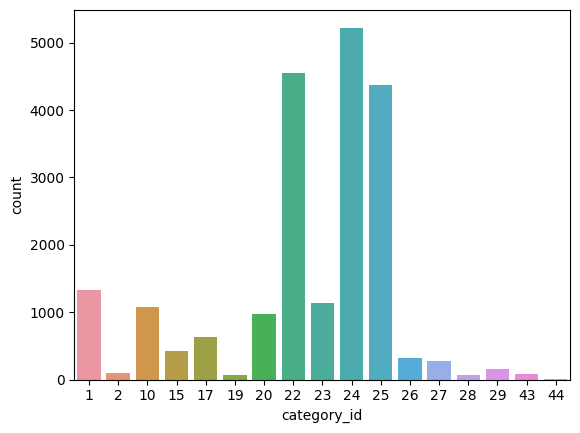

In [ ]:
# category_idd에 대한 시각화
sns.countplot(x=selected_cols_two.category_id)
plt.show()

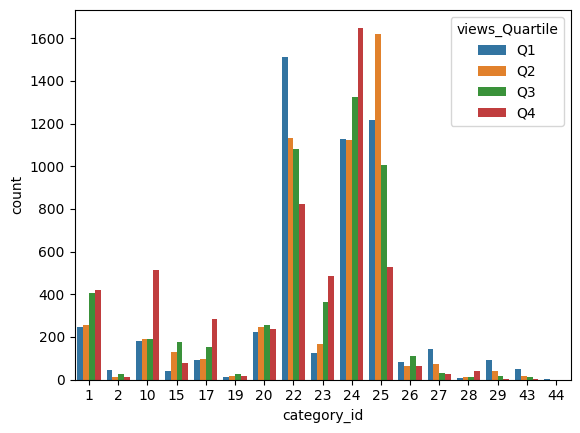

In [ ]:
# category_id을 views별 시각화
sns.countplot(x=selected_cols_two.category_id, hue=selected_cols_two.views_Quartile)
plt.show()

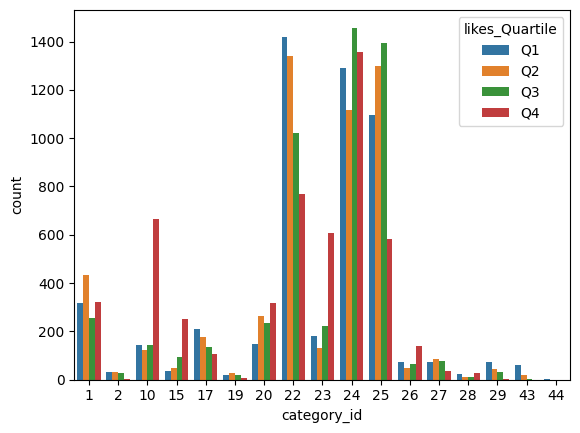

In [ ]:
# category_id을 likes별 시각화
sns.countplot(x=selected_cols_two.category_id, hue=selected_cols_two.likes_Quartile)
plt.show()

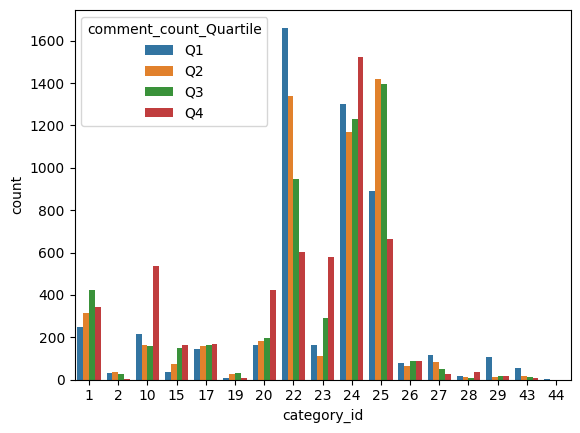

In [ ]:
# category_id을 quartile별 시각화
sns.countplot(x=selected_cols_two.category_id, hue=selected_cols_two.comment_count_Quartile)
plt.show()